# Proof of Concept: Lambda as a Diagnostic Metric

This notebook runs experiments to investigate whether **λ (lambda/curvature rate)** serves as a reliable and interpretable diagnostic metric for neural network training quality.

## Experiment Overview

The experiment observes λ behavior across:
- **7 regularization methods**: baseline, dropout, weight decay, augmentation, label smoothing, SAM, input gradient penalty
- **2 datasets**: MNIST and CIFAR-10
- **Rich lambda measurements**: K=15 directions, order=6 derivatives
- **4 post-hoc validation analyses**: direction convergence, order sensitivity, temporal stability, joint optimization

Rather than manipulating λ directly, we observe its natural behavior to determine if it consistently reflects desirable model properties.

## 1. Setup

Import necessary libraries and configure environment.

In [ ]:
import os
if os.path.exists('flatgrad'):
    %cd flatgrad
    !git pull origin main
else:
    !git clone https://github.com/jacobposchl/flatgrad
    %cd flatgrad

fatal: destination path 'flatgrad' already exists and is not an empty directory.
/content/flatgrad


In [2]:
%pip install -q -r requirements.txt

In [4]:
import sys
from pathlib import Path
import torch

# Add project root to path (we're already in flatgrad/ after cloning)
project_root = Path.cwd()
sys.path.insert(0, str(project_root))

# Verify we're in the right directory
print(f"Current directory: {Path.cwd()}")
print(f"Project root: {project_root}")

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Current directory: /content/flatgrad
Project root: /content/flatgrad
Using device: cuda
GPU: NVIDIA A100-SXM4-40GB


## 2. Quick Configuration Check

Preview what experiments will run.

In [5]:
from experiments.proof_of_concept.helpers.experiment_config import get_all_experiment_configs

# Get configurations for MNIST (preview)
configs = get_all_experiment_configs(dataset='mnist')

print(f"Number of experiments: {len(configs)}\n")
print("Experiments to run:")
for i, config in enumerate(configs, 1):
    print(f"  {i:2d}. {config.method_name:<20s} (dataset: {config.dataset})")

print(f"\nEach experiment runs for {configs[0].epochs} epochs with K={configs[0].K_dirs} directions")
print(f"Expected total runtime: ~{len(configs) * 5} minutes (on GPU)")

Number of experiments: 17

Experiments to run:
   1. baseline             (dataset: mnist)
   2. dropout_0.3          (dataset: mnist)
   3. dropout_0.5          (dataset: mnist)
   4. dropout_0.7          (dataset: mnist)
   5. weight_decay_0.0001  (dataset: mnist)
   6. weight_decay_0.001   (dataset: mnist)
   7. weight_decay_0.01    (dataset: mnist)
   8. augmentation         (dataset: mnist)
   9. label_smoothing_0.05 (dataset: mnist)
  10. label_smoothing_0.1  (dataset: mnist)
  11. label_smoothing_0.15 (dataset: mnist)
  12. sam_0.05             (dataset: mnist)
  13. sam_0.1              (dataset: mnist)
  14. sam_0.2              (dataset: mnist)
  15. igp_0.01             (dataset: mnist)
  16. igp_0.1              (dataset: mnist)
  17. igp_1.0              (dataset: mnist)

Each experiment runs for 50 epochs with K=15 directions
Expected total runtime: ~85 minutes (on GPU)


## 3. Run Experiments

Run all experiments and collect lambda measurements across regularization methods..

In [6]:
from experiments.proof_of_concept.proof_of_concept import run_all_experiments, set_seed

# Configuration
DATASET = 'both'  # Options: 'mnist', 'cifar10', 'both'
OUTPUT_DIR = 'results/proof_of_concept'
SEED = 42

# Set seed for reproducibility
set_seed(SEED)

# Run experiments
results = run_all_experiments(
    dataset=DATASET,
    output_base_dir=OUTPUT_DIR
)

print(f"\n✓ Completed {len(results)} experiments successfully!")


PROOF OF CONCEPT: Lambda as a Diagnostic Metric

Running 34 experiments on BOTH
Output directory: results/proof_of_concept
Device: cuda


[1/34] Starting experiment: mnist/baseline

Running Experiment: baseline on mnist



100%|██████████| 9.91M/9.91M [00:00<00:00, 43.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.08MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.60MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.6MB/s]


Evaluating at epoch 0...
Measuring lambda at epoch 0...
  Measuring lambda at epoch 1...
Epoch 1/50 | Train Acc: 0.7386 | Test Acc: 0.9020 | Loss: 0.3134 | ECE: 0.0126 | Time: 1.76s
  Measuring lambda at epoch 2...
Epoch 2/50 | Train Acc: 0.9274 | Test Acc: 0.9390 | Loss: 0.2017 | ECE: 0.0117 | Time: 1.67s
  Measuring lambda at epoch 3...
Epoch 3/50 | Train Acc: 0.9564 | Test Acc: 0.9620 | Loss: 0.1730 | ECE: 0.0250 | Time: 1.69s
  Measuring lambda at epoch 4...
Epoch 4/50 | Train Acc: 0.9700 | Test Acc: 0.9540 | Loss: 0.1464 | ECE: 0.0087 | Time: 1.66s
  Measuring lambda at epoch 5...
Epoch 5/50 | Train Acc: 0.9796 | Test Acc: 0.9620 | Loss: 0.1199 | ECE: 0.0109 | Time: 1.64s
  Measuring lambda at epoch 6...
Epoch 6/50 | Train Acc: 0.9856 | Test Acc: 0.9630 | Loss: 0.1216 | ECE: 0.0131 | Time: 1.66s
  Measuring lambda at epoch 7...
Epoch 7/50 | Train Acc: 0.9896 | Test Acc: 0.9710 | Loss: 0.0948 | ECE: 0.0086 | Time: 1.66s
  Measuring lambda at epoch 8...
Epoch 8/50 | Train Acc: 0.992

100%|██████████| 170M/170M [00:04<00:00, 42.0MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


Evaluating at epoch 0...
Measuring lambda at epoch 0...
  Measuring lambda at epoch 1...
Epoch 1/50 | Train Acc: 0.2546 | Test Acc: 0.3520 | Loss: 1.8121 | ECE: 0.0451 | Time: 2.77s
  Measuring lambda at epoch 2...
Epoch 2/50 | Train Acc: 0.3884 | Test Acc: 0.4520 | Loss: 1.5547 | ECE: 0.0295 | Time: 2.72s
  Measuring lambda at epoch 3...
Epoch 3/50 | Train Acc: 0.4684 | Test Acc: 0.4270 | Loss: 1.5834 | ECE: 0.0452 | Time: 2.73s
  Measuring lambda at epoch 4...
Epoch 4/50 | Train Acc: 0.5124 | Test Acc: 0.4730 | Loss: 1.4405 | ECE: 0.0463 | Time: 2.70s
  Measuring lambda at epoch 5...
Epoch 5/50 | Train Acc: 0.5518 | Test Acc: 0.5090 | Loss: 1.3452 | ECE: 0.0503 | Time: 2.72s
  Measuring lambda at epoch 6...
Epoch 6/50 | Train Acc: 0.5834 | Test Acc: 0.5140 | Loss: 1.4206 | ECE: 0.0665 | Time: 2.71s
  Measuring lambda at epoch 7...
Epoch 7/50 | Train Acc: 0.6328 | Test Acc: 0.5260 | Loss: 1.4090 | ECE: 0.0787 | Time: 2.70s
  Measuring lambda at epoch 8...
Epoch 8/50 | Train Acc: 0.644

## 4. Run Validation Analyses

Execute 4 post-hoc validation analyses to assess lambda measurement quality and consistency.

In [7]:
from experiments.proof_of_concept.proof_of_concept import run_validation_analyses_wrapper

# Run all 4 validation analyses:
# 1. Direction Convergence (K analysis)
# 2. Order Sensitivity (derivative order analysis)
# 3. Temporal Stability (lambda evolution over training)
# 4. Joint K-Order Optimization (heatmap analysis)

run_validation_analyses_wrapper(OUTPUT_DIR)

print("\n✓ Validation analyses complete!")


Running Post-Hoc Validation Analyses


Found 34 experiment results
Output directory: results/proof_of_concept/validation_analyses


Direction Convergence Analysis

Processing: mnist/sam_0.2
  Saved convergence plot
Processing: mnist/label_smoothing_0.15
  Saved convergence plot
Processing: mnist/label_smoothing_0.1
  Saved convergence plot
Processing: mnist/sam_0.1
  Saved convergence plot
Processing: mnist/igp_0.01
  Saved convergence plot
Processing: mnist/weight_decay_0.0001
  Saved convergence plot
Processing: mnist/baseline
  Saved convergence plot
Processing: mnist/dropout_0.7
  Saved convergence plot
Processing: mnist/augmentation
  Saved convergence plot
Processing: mnist/igp_1.0
  Saved convergence plot
Processing: mnist/dropout_0.5
  Saved convergence plot
Processing: mnist/weight_decay_0.01
  Saved convergence plot
Processing: mnist/igp_0.1
  Saved convergence plot
Processing: mnist/label_smoothing_0.05
  Saved convergence plot
Processing: mnist/dropout_0.3
  Saved converge

## 5. Inspect Results

Examine experiment outcomes and lambda measurements.

In [8]:
import pandas as pd
import json
from pathlib import Path

# Collect results from all experiments
results_summary = []

output_path = Path(OUTPUT_DIR)
for experiment_dir in output_path.rglob('summary.json'):
    with open(experiment_dir, 'r') as f:
        data = json.load(f)
        results_summary.append(data)

# Create DataFrame
df = pd.DataFrame(results_summary)
df = df.sort_values(['dataset', 'method_name'])

# Display key metrics
print("Experiment Results Summary:")
print("="*100)
display(df[[
    'dataset', 'method_name',
    'final_test_accuracy', 'final_generalization_gap',
    'final_lambda_mean', 'final_lambda_std', 'final_ece'
]].round(4))

print(f"\n✓ Found {len(results_summary)} completed experiments")

Experiment Results Summary:


,dataset,method_name,final_test_accuracy,final_generalization_gap,final_lambda_mean,final_lambda_std,final_ece
25,cifar10,augmentation,0.634,0.1868,-2.5985,0.0434,0.1655
23,cifar10,baseline,0.565,0.4350,-1.3810,0.0747,0.3655
31,cifar10,dropout_0.3,0.564,0.4180,-1.4417,0.0776,0.3211
27,cifar10,dropout_0.5,0.595,0.3774,-1.5796,0.0941,0.2984
24,cifar10,dropout_0.7,0.636,0.2822,-1.8141,0.0760,0.2432
21,cifar10,igp_0.01,0.565,0.4350,-1.2552,0.0945,0.3654
29,cifar10,igp_0.1,0.563,0.4370,-1.3744,0.0606,0.3672
26,cifar10,igp_1.0,0.587,0.4130,-1.3310,0.0557,0.3430
30,cifar10,label_smoothing_0.05,0.554,0.4460,-2.9460,0.0393,0.0441
19,cifar10,label_smoothing_0.1,0.562,0.4380,-3.0774,0.0398,0.0406



✓ Found 34 completed experiments


## 6. Visualize Key Findings

Display validation analysis plots to understand lambda behavior.

Example: Temporal Stability Analysis - Baseline MNIST


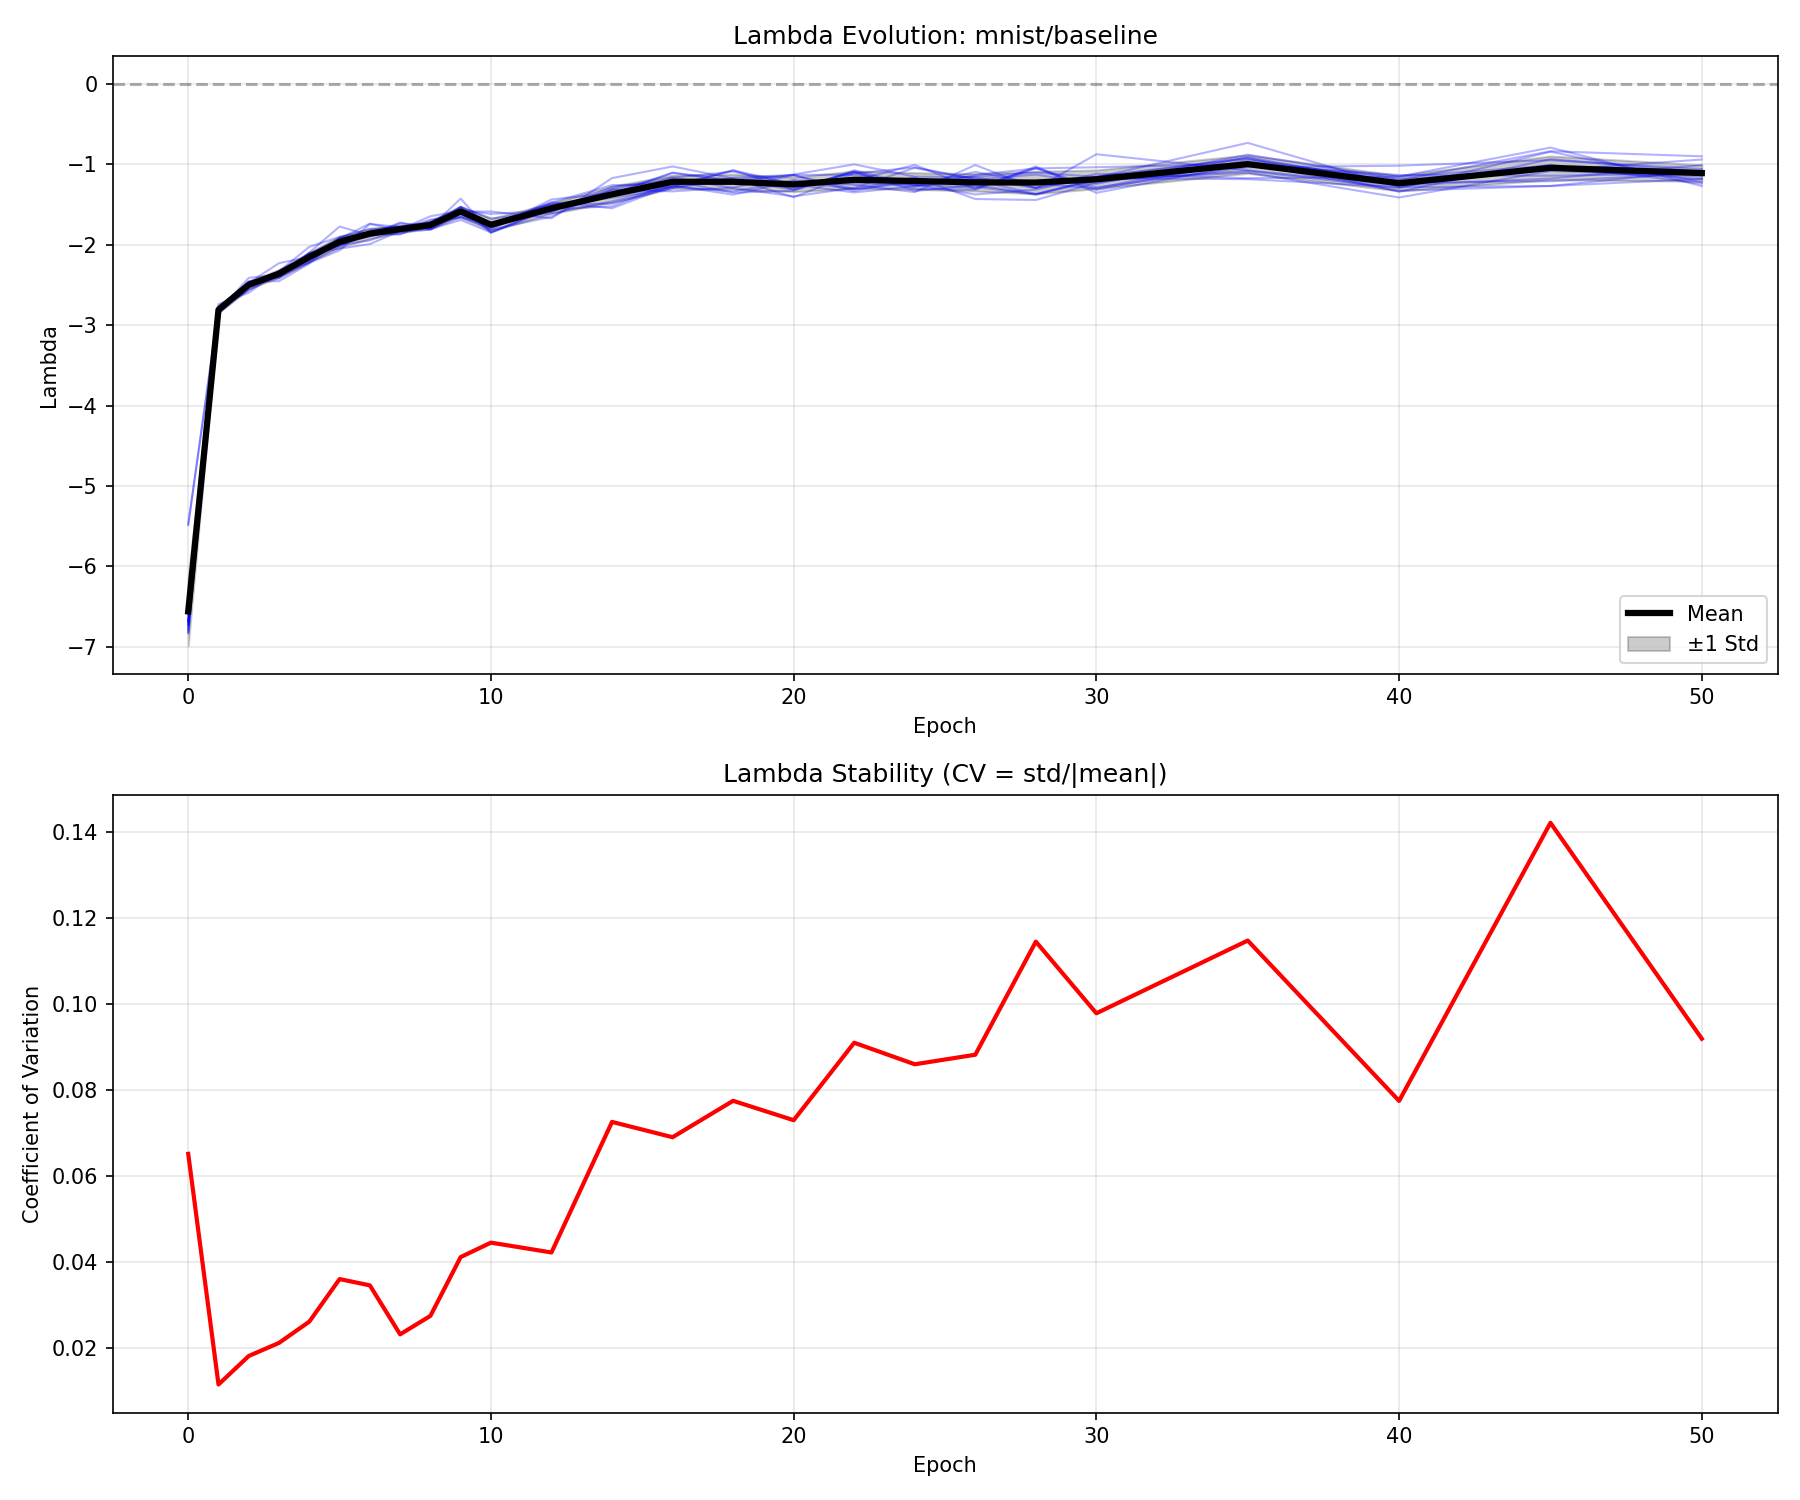

In [10]:
from IPython.display import Image, display
import matplotlib.pyplot as plt

validation_dir = Path(OUTPUT_DIR) / 'validation_analyses'

# Display temporal stability plots (example: baseline MNIST)
print("Example: Temporal Stability Analysis - Baseline MNIST")
print("="*80)

spaghetti_plot = validation_dir / 'temporal_stability' / 'mnist_baseline_spaghetti.png'
if spaghetti_plot.exists():
    display(Image(filename=str(spaghetti_plot)))
else:
    print(f"Plot not found: {spaghetti_plot}")


Direction Convergence Analysis - Shows if K=15 directions is sufficient


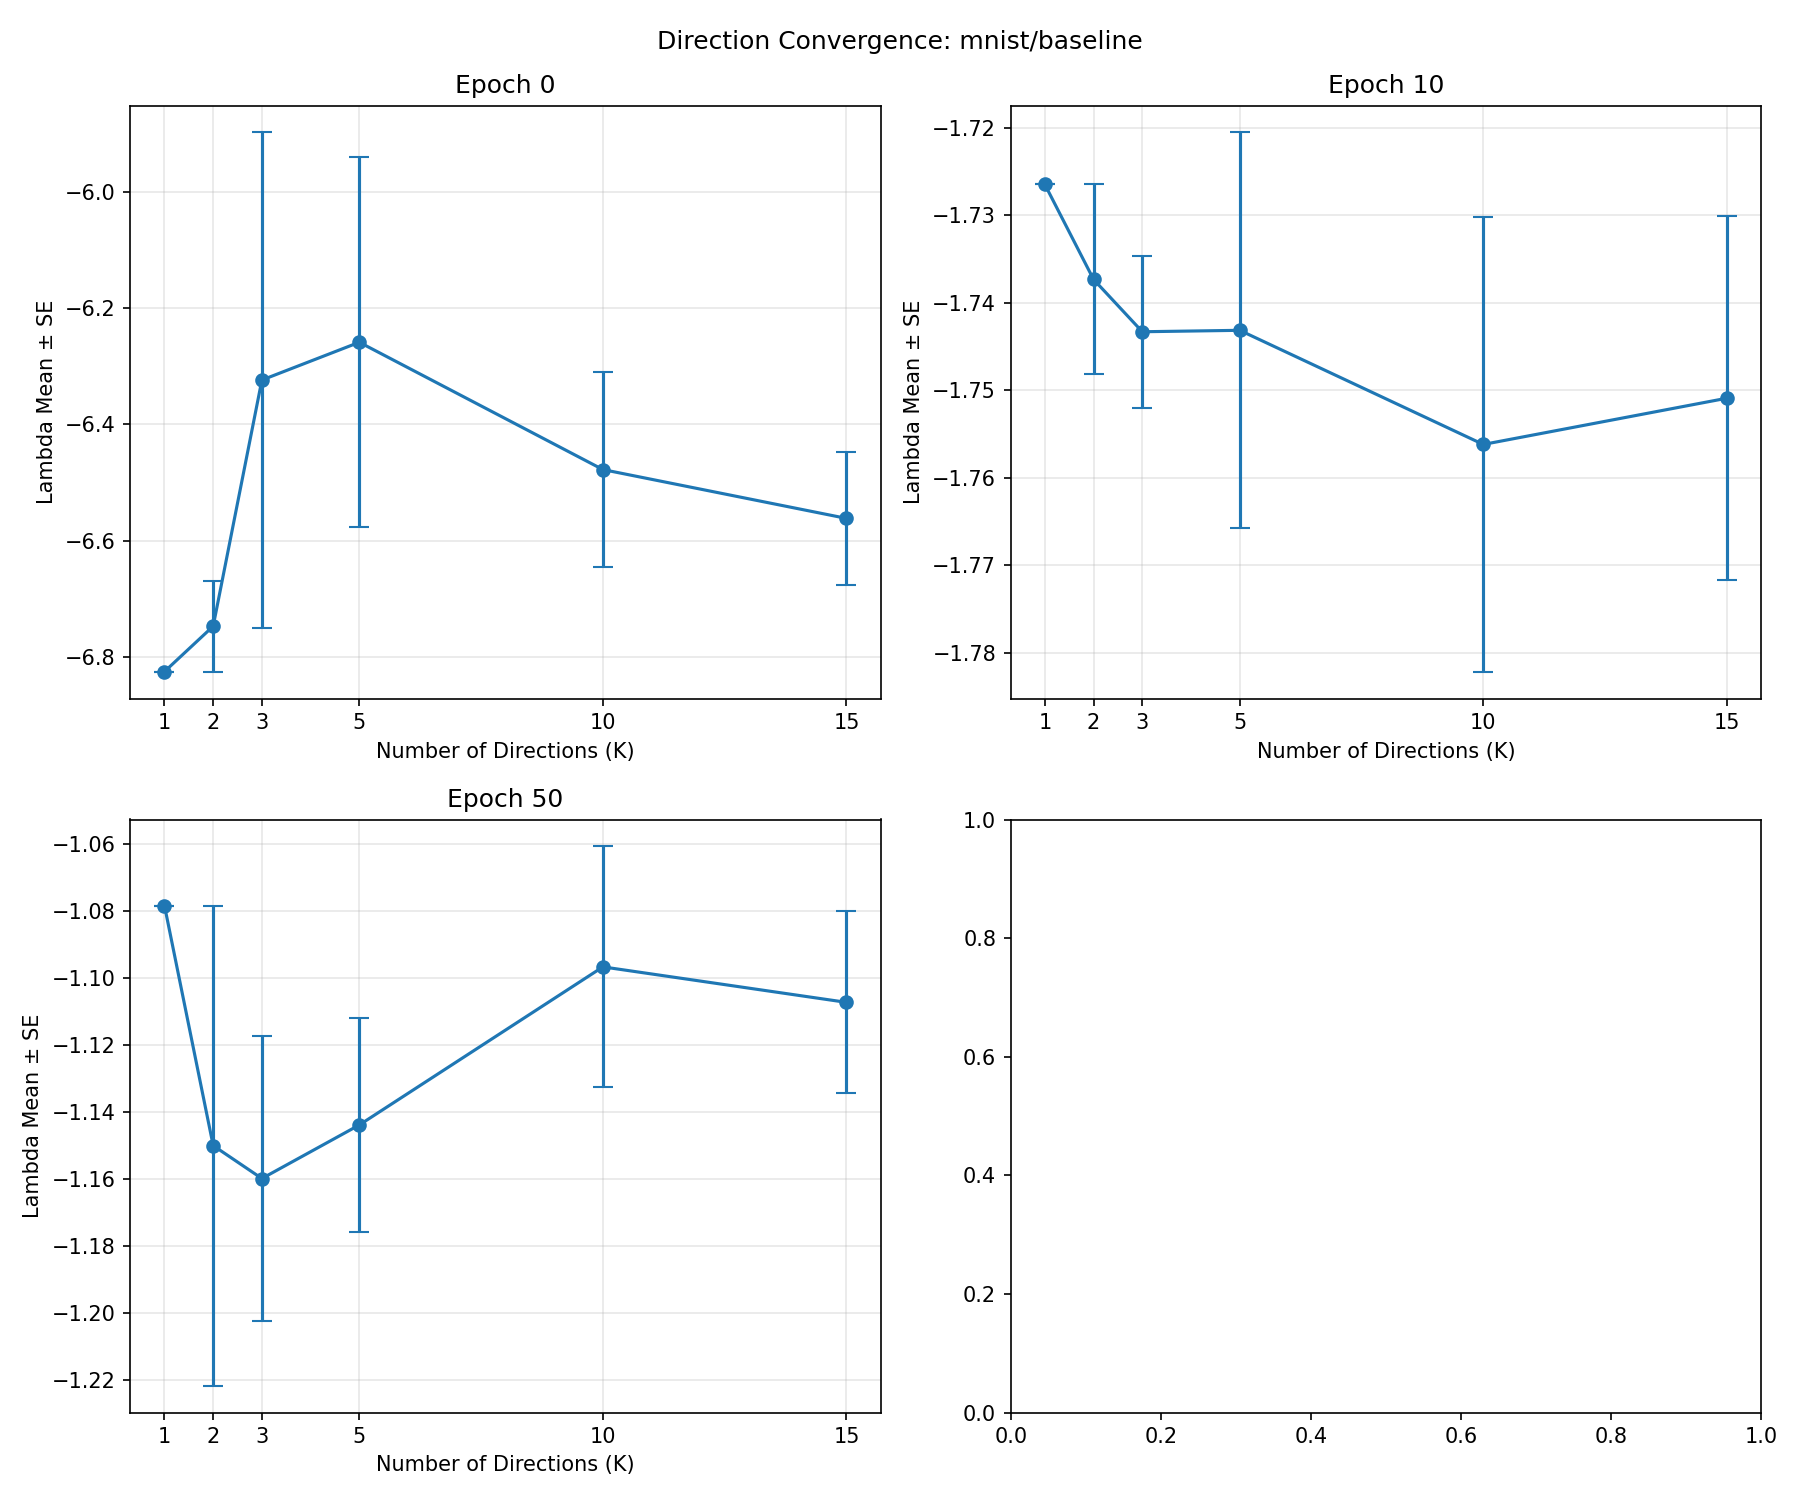

In [11]:
# Display direction convergence analysis
print("\nDirection Convergence Analysis - Shows if K=15 directions is sufficient")
print("="*80)

convergence_plot = validation_dir / 'direction_convergence' / 'mnist_baseline_convergence.png'
if convergence_plot.exists():
    display(Image(filename=str(convergence_plot)))
else:
    print(f"Plot not found: {convergence_plot}")


Joint K-Order Optimization - Heatmap of parameter choices


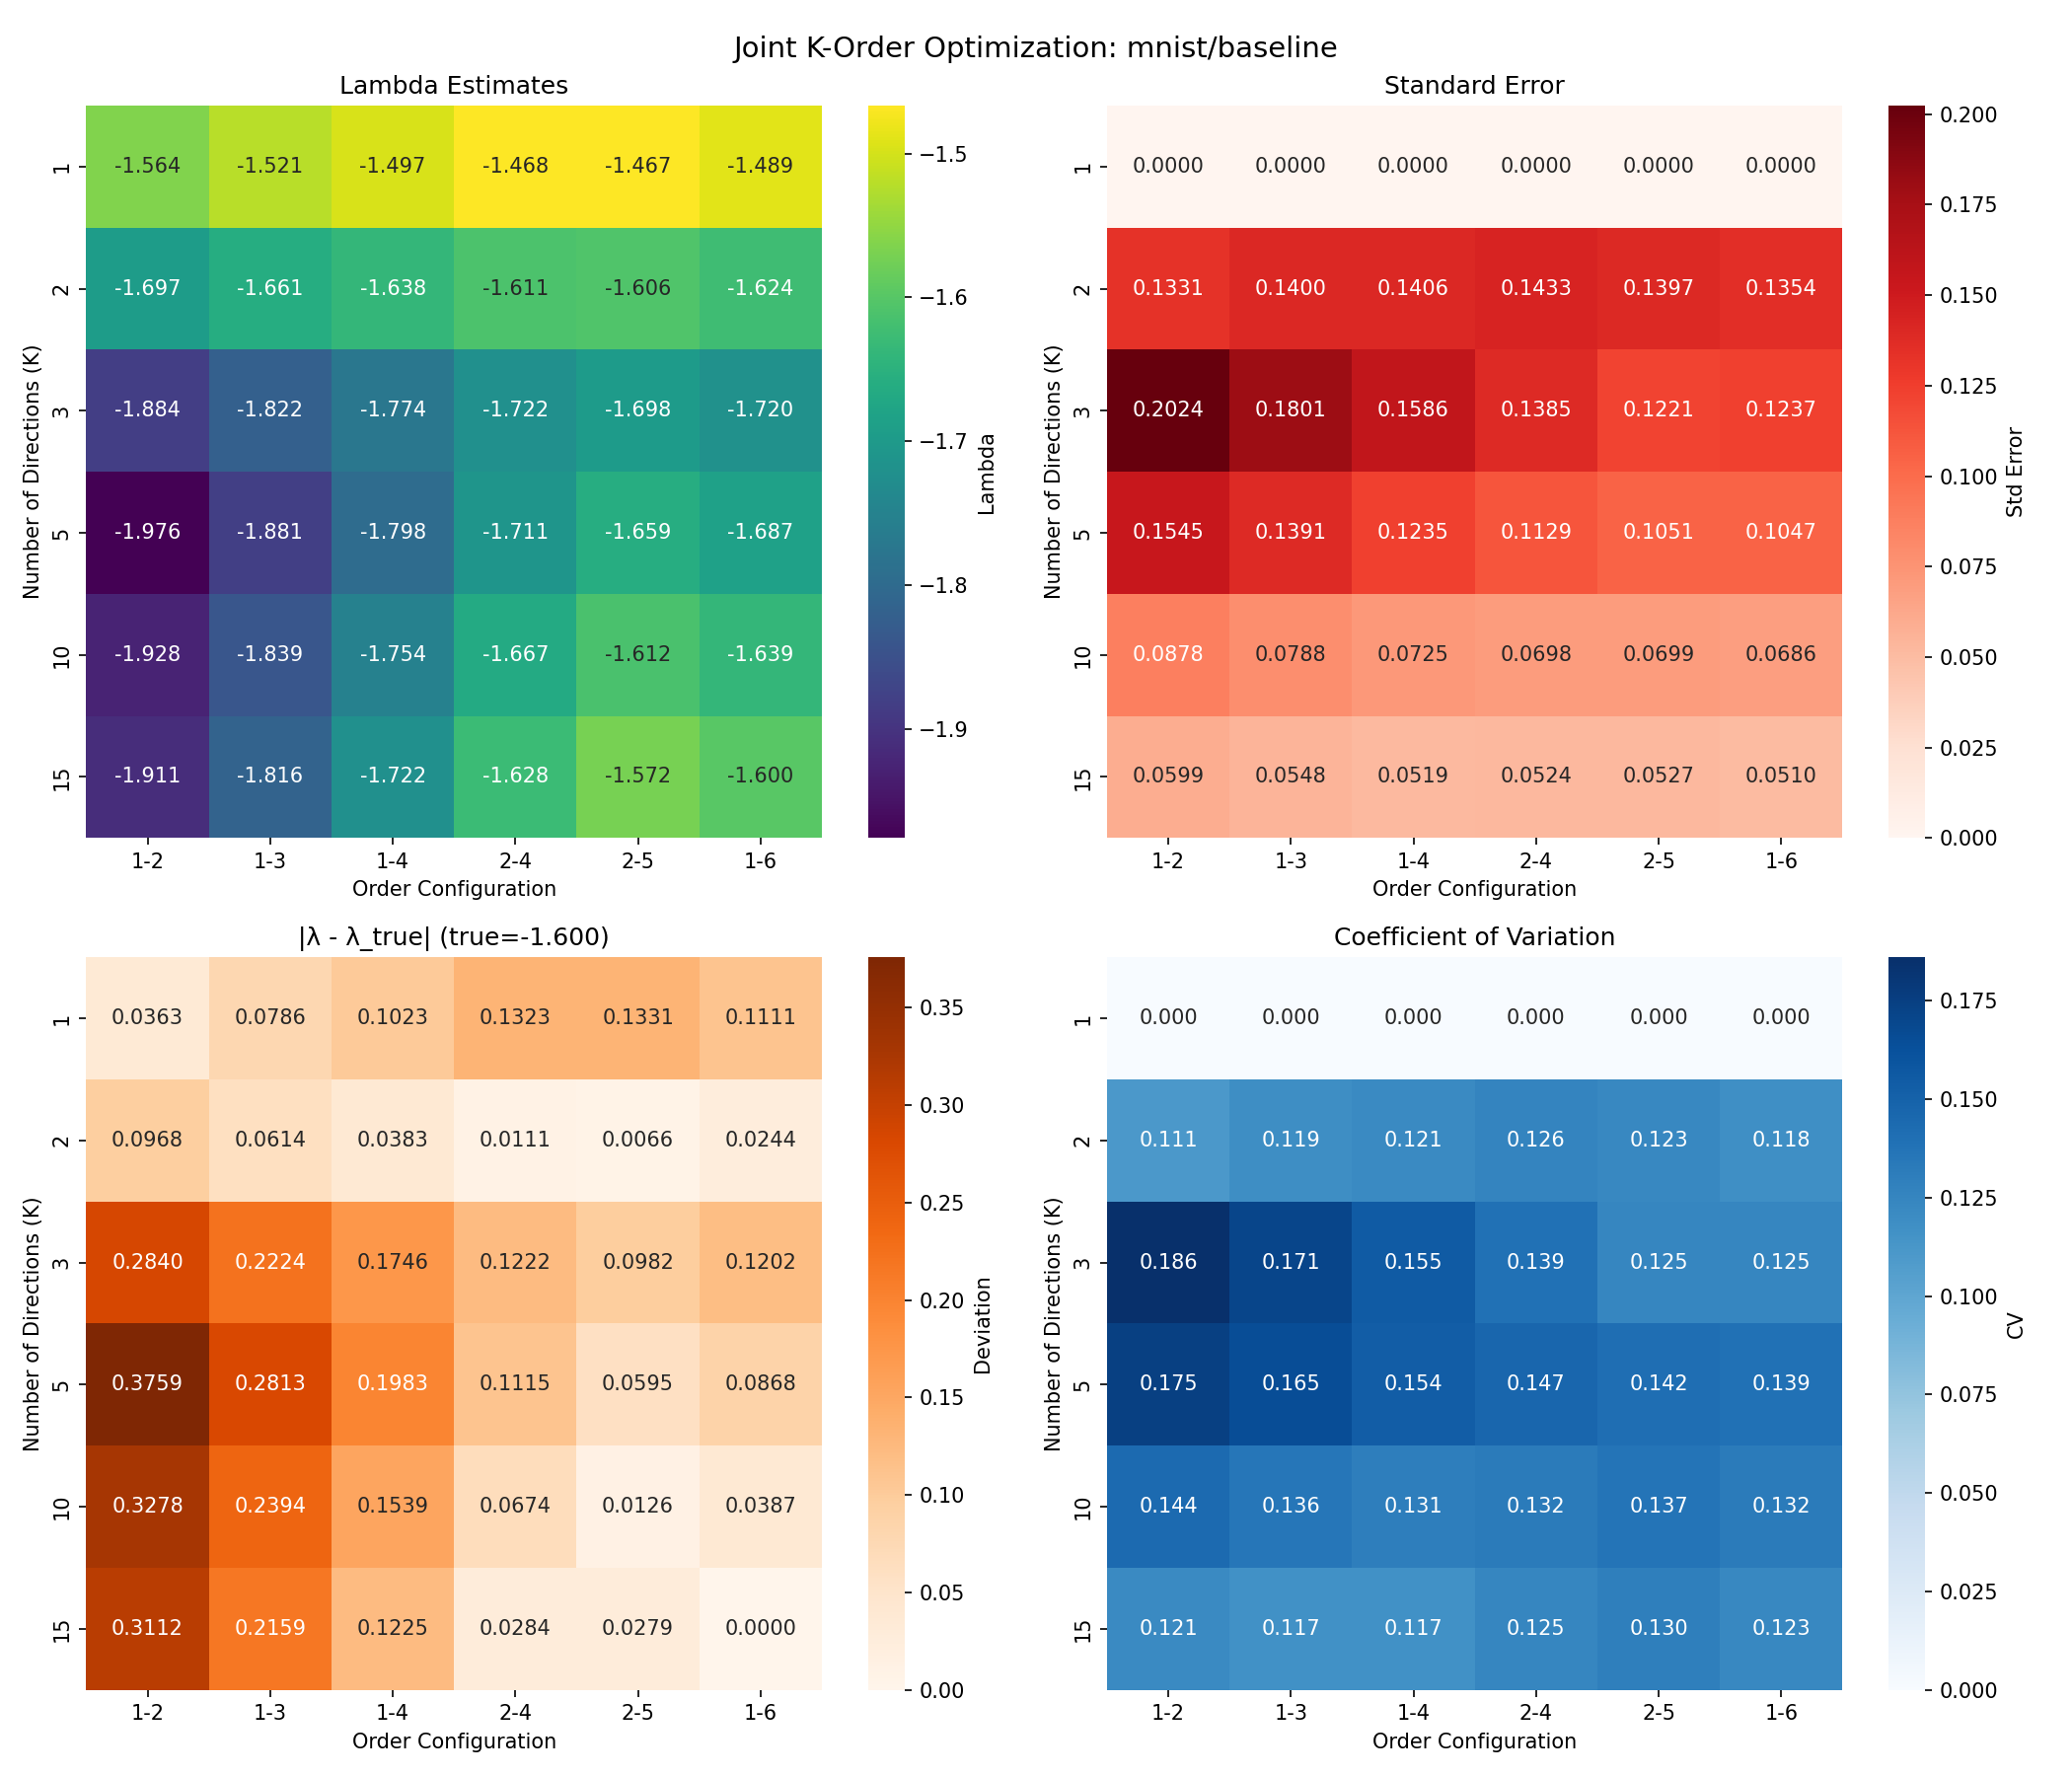

In [12]:
# Display joint K-order optimization
print("\nJoint K-Order Optimization - Heatmap of parameter choices")
print("="*80)

joint_plot = validation_dir / 'joint_optimization' / 'mnist_baseline_joint_optimization.png'
if joint_plot.exists():
    display(Image(filename=str(joint_plot)))
else:
    print(f"Plot not found: {joint_plot}")

## 7. Compare Lambda Across Regularization Methods

Analyze how lambda differs across regularization techniques.

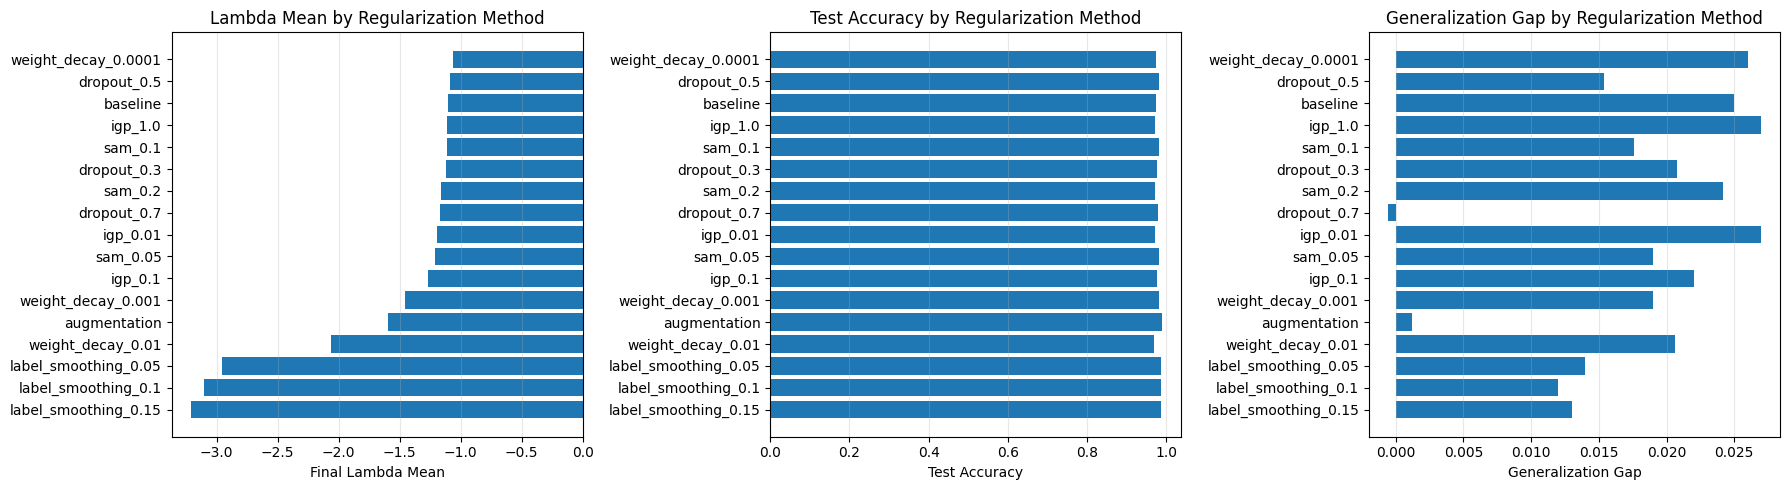


Key Insight: Does lower lambda correlate with better generalization?


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for one dataset
mnist_results = df[df['dataset'] == 'mnist'].copy()

# Sort by lambda mean
mnist_results = mnist_results.sort_values('final_lambda_mean')

# Create comparison plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Lambda Mean
axes[0].barh(mnist_results['method_name'], mnist_results['final_lambda_mean'])
axes[0].set_xlabel('Final Lambda Mean')
axes[0].set_title('Lambda Mean by Regularization Method')
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Test Accuracy
axes[1].barh(mnist_results['method_name'], mnist_results['final_test_accuracy'])
axes[1].set_xlabel('Test Accuracy')
axes[1].set_title('Test Accuracy by Regularization Method')
axes[1].grid(axis='x', alpha=0.3)

# Plot 3: Generalization Gap
axes[2].barh(mnist_results['method_name'], mnist_results['final_generalization_gap'])
axes[2].set_xlabel('Generalization Gap')
axes[2].set_title('Generalization Gap by Regularization Method')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insight: Does lower lambda correlate with better generalization?")

## 8. Download Results Folder

In [13]:
# Download results folder from Colab to local computer
from google.colab import files
import shutil
from pathlib import Path

# Create zip archive of results
results_dir = Path('results/proof_of_concept')
zip_path = 'proof_of_concept_results.zip'

if results_dir.exists():
    print(f"Creating zip archive of {results_dir}...")
    shutil.make_archive(
        'proof_of_concept_results',  # output filename (without .zip)
        'zip',                        # archive format
        results_dir.parent,           # root directory
        results_dir.name              # base directory to archive
    )
    print(f"✓ Created {zip_path}")

    # Download the zip file
    print("Downloading... (this may take a minute)")
    files.download(zip_path)
    print("✓ Download complete! Check your Downloads folder.")
else:
    print(f"❌ Results directory not found: {results_dir}")
    print("Make sure experiments have completed successfully.")

Creating zip archive of results/proof_of_concept...
✓ Created proof_of_concept_results.zip
Downloading... (this may take a minute)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Download complete! Check your Downloads folder.
